### KNN on abalone dataset

#### import libraries

In [13]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('abalone.data.csv')
data.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


#### Our data has no headers, so we add the header to the data frame.

In [3]:
data.columns =['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [7]:
# sex is not a physical measure, we ignore it. 
X = data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
Y = data['Rings']

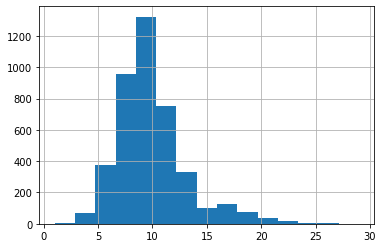

In [8]:
Y.hist(bins=15)
plt.show()

In [9]:
correlation_matrix = data.corr()
correlation_matrix["Rings"]

Length            0.557123
Diameter          0.575005
Height            0.558109
Whole weight      0.540818
Shucked weight    0.421256
Viscera weight    0.504274
Shell weight      0.628031
Rings             1.000000
Name: Rings, dtype: float64

#### split data to train and test.

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

#### Train

In [11]:
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

#### Test

In [12]:
pred = neigh.predict(X_test)
eval = (pred == Y_test).sum()/len(Y_test)
eval

0.24043062200956938

In [17]:
# for complete report we can use:
print(metrics.classification_report(Y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.40      0.40      0.40        10
           5       0.36      0.31      0.33        26
           6       0.22      0.31      0.26        45
           7       0.31      0.35      0.33        79
           8       0.30      0.30      0.30       117
           9       0.21      0.38      0.27       120
          10       0.23      0.31      0.26       120
          11       0.25      0.19      0.21       111
          12       0.15      0.11      0.13        45
          13       0.13      0.04      0.06        47
          14       0.22      0.07      0.11        28
          15       0.00      0.00      0.00        26
          16       0.00      0.00      0.00        17
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         9
          19       0.00      0.00      0.00        11
          20       0.00    

C:\Users\Beni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Beni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Beni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif